<a href="https://colab.research.google.com/github/RakibRayans/Computer-Vision/blob/main/Cell_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy opencv-python scikit-image tensorflow keras matplotlib

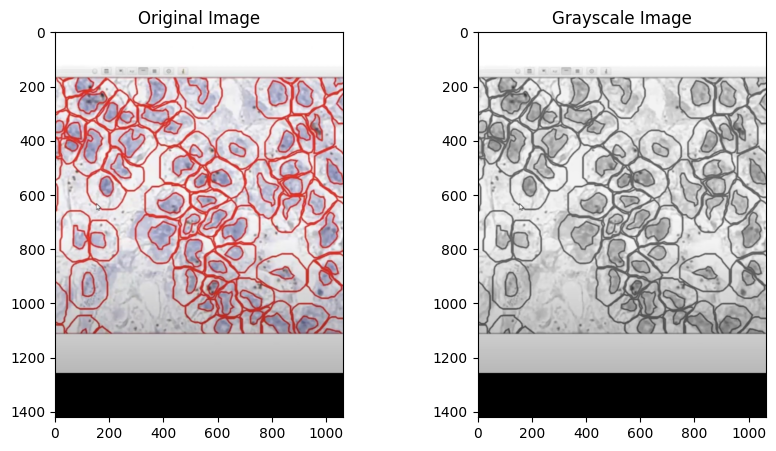

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
# Try loading the image from a different path
image = cv2.imread('/content/drive/MyDrive/Segementation/cell/cell.jpeg')

# Or, try loading the image from a URL
import urllib.request

# url = 'https://example.com/cell_image.png'
# image = cv2.imread(urllib.request.urlopen(url))

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')
plt.show()


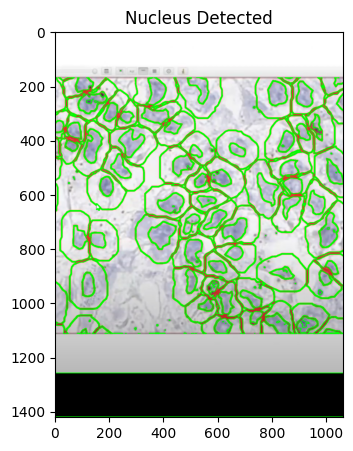

In [ ]:
# Apply thresholding to segment the nucleus
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
nucleus_detected = image.copy()
cv2.drawContours(nucleus_detected, contours, -1, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(5, 5))
plt.title('Nucleus Detected')
plt.imshow(cv2.cvtColor(nucleus_detected, cv2.COLOR_BGR2RGB))
plt.show()


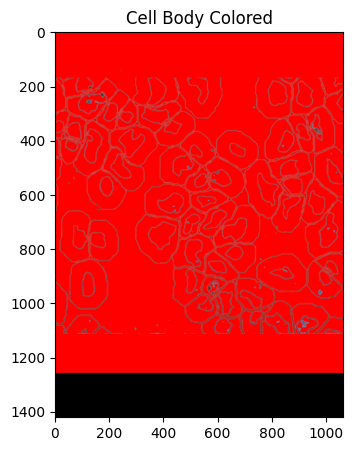

In [ ]:
# Create a mask for the nucleus
mask = np.zeros_like(gray)
cv2.drawContours(mask, contours, -1, 255, thickness=cv2.FILLED)

# Invert the mask to get the cell body
cell_body_mask = cv2.bitwise_not(mask)

# Color the cell body in blue
cell_body_colored = image.copy()
cell_body_colored[cell_body_mask == 255] = [0, 0, 255]

# Display the colored cell body
plt.figure(figsize=(5, 5))
plt.title('Cell Body Colored')
plt.imshow(cv2.cvtColor(cell_body_colored, cv2.COLOR_BGR2RGB))
plt.show()


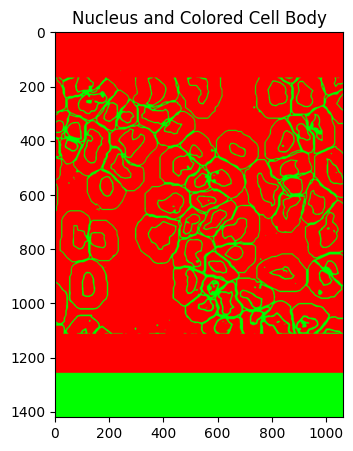

In [ ]:
# Combine nucleus and colored cell body
combined_image = image.copy()
combined_image[cell_body_mask == 255] = [0, 0, 255]  # Color cell body
combined_image[mask == 255] = [0, 255, 0]  # Color nucleus

# Display the combined result
plt.figure(figsize=(5, 5))
plt.title('Nucleus and Colored Cell Body')
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
pip install opencv-python pydrive numpy matplotlib


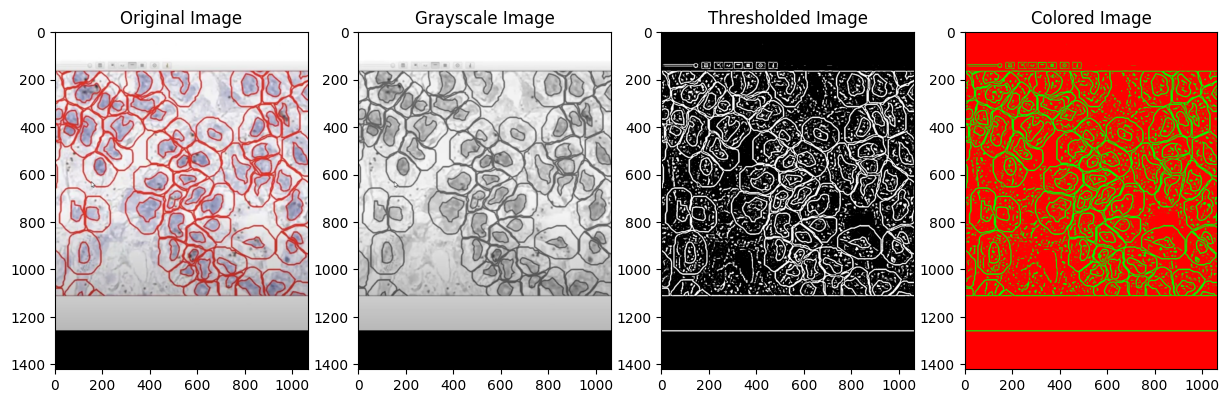

In [ ]:
from google.colab import drive
import cv2
import numpy as np
from matplotlib import pyplot as plt

# # Mount Google Drive
# drive.mount('/content/drive')

# Replace 'your_image_path' with the actual path to your image in Google Drive
image_path = '/content/drive/MyDrive/Segementation/cell/cell.jpeg'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to better segment the nucleus
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the nucleus
nucleus_mask = np.zeros_like(gray)
cv2.drawContours(nucleus_mask, contours, -1, 255, thickness=cv2.FILLED)

# Create the cell body mask by inverting the nucleus mask
cell_body_mask = cv2.bitwise_not(nucleus_mask)

# Dilate the nucleus mask to create the boundary region
kernel_size = 15
kernel = np.ones((kernel_size, kernel_size), np.uint8)
dilated_nucleus_mask = cv2.dilate(nucleus_mask, kernel, iterations=1)

# The region between the nucleus boundary and the cell boundary
region_between_mask = cv2.bitwise_and(dilated_nucleus_mask, cell_body_mask)

# Color the regions
colored_image = image.copy()
colored_image[nucleus_mask == 255] = [0, 255, 0]  # Green for nucleus
colored_image[region_between_mask == 255] = [0, 255, 255]  # Cyan for region between nucleus and cell body
colored_image[cell_body_mask == 255] = [0, 0, 255]  # Blue for cell body

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 4, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Thresholded Image')
plt.imshow(thresh, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Colored Image')
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))

plt.show()


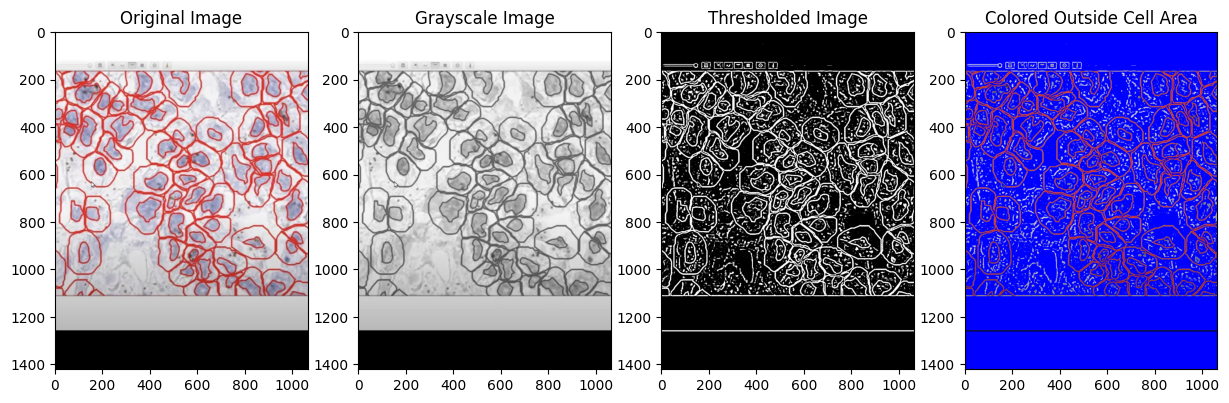

In [ ]:


# Replace 'your_image_path' with the actual path to your image in Google Drive
image_path = '/content/drive/MyDrive/Segementation/cell/cell.jpeg'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to better segment the cell
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the entire cell
cell_mask = np.zeros_like(gray)
cv2.drawContours(cell_mask, contours, -1, 255, thickness=cv2.FILLED)

# Invert the mask to get the area outside the cell
outside_cell_mask = cv2.bitwise_not(cell_mask)

# Color the areas outside the cell
colored_image = image.copy()
colored_image[outside_cell_mask == 255] = [255, 0, 0]  # Red for areas outside the cell

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 4, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Thresholded Image')
plt.imshow(thresh, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Colored Outside Cell Area')
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))

plt.show()


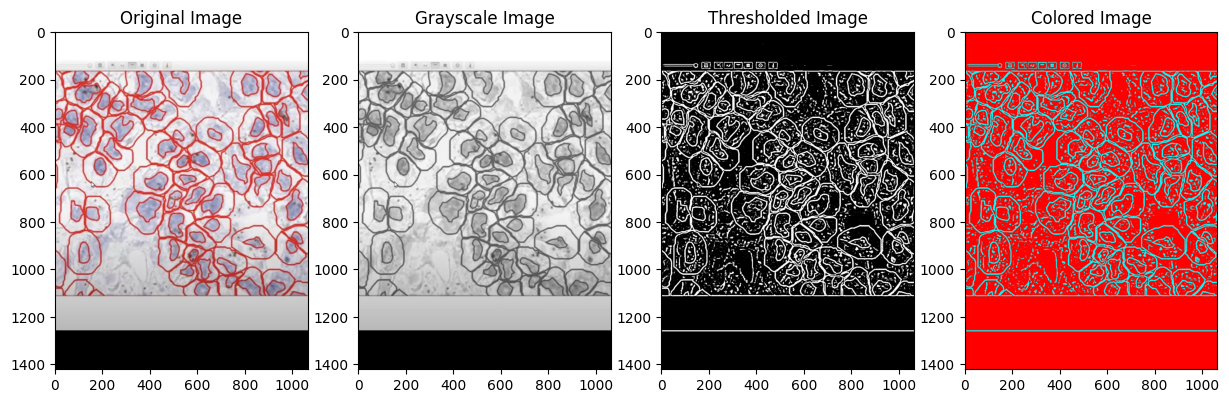

In [ ]:


# Replace 'your_image_path' with the actual path to your image in Google Drive
image_path = '/content/drive/MyDrive/Segementation/cell/cell.jpeg'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to better segment the nucleus
nucleus_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours of the nucleus
nucleus_contours, _ = cv2.findContours(nucleus_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the nucleus
nucleus_mask = np.zeros_like(gray)
cv2.drawContours(nucleus_mask, nucleus_contours, -1, 255, thickness=cv2.FILLED)

# Create the cell body mask by inverting the nucleus mask
cell_body_mask = cv2.bitwise_not(nucleus_mask)

# Dilate the nucleus mask to create a boundary
kernel_size = 15
kernel = np.ones((kernel_size, kernel_size), np.uint8)
dilated_nucleus_mask = cv2.dilate(nucleus_mask, kernel, iterations=1)

# Create the mask for the region between nucleus and cell boundary
region_between_mask = cv2.bitwise_and(dilated_nucleus_mask, cell_body_mask)

# Create a mask for the entire cell (including the nucleus)
cell_mask = np.zeros_like(gray)
cv2.drawContours(cell_mask, nucleus_contours, -1, 255, thickness=cv2.FILLED)

# Color the regions
colored_image = image.copy()
colored_image[cell_body_mask == 255] = [0, 0, 255]  # Blue for cell body
colored_image[nucleus_mask == 255] = [0, 255, 0]  # Green for nucleus
colored_image[cv2.bitwise_not(cell_body_mask) == 255] = [255, 255, 0]  # Yellow for background

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 4, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Thresholded Image')
plt.imshow(nucleus_thresh, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Colored Image')
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))

plt.show()


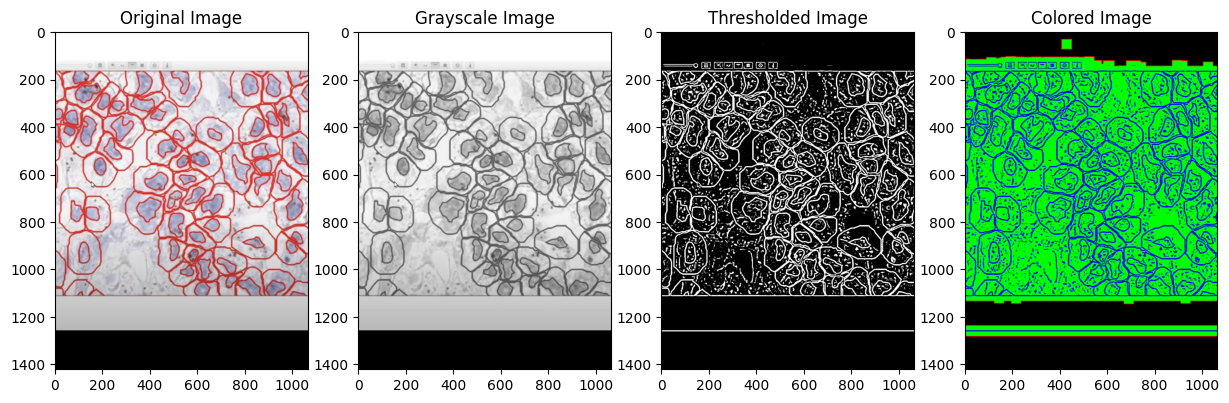

In [ ]:


# Replace 'your_image_path' with the actual path to your image in Google Drive
image_path = '/content/drive/MyDrive/Segementation/cell/cell.jpeg'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to better segment the nucleus
nucleus_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours of the nucleus
nucleus_contours, _ = cv2.findContours(nucleus_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask for the nucleus
nucleus_mask = np.zeros_like(gray)
cv2.drawContours(nucleus_mask, nucleus_contours, -1, 255, thickness=cv2.FILLED)

# Dilate the nucleus mask to approximate the cell body area
kernel_size = 15
kernel = np.ones((kernel_size, kernel_size), np.uint8)
cell_body_mask = cv2.dilate(nucleus_mask, kernel, iterations=3)  # Increase iterations if needed

# Create a colored image initialized with zeros (black)
colored_image = np.zeros_like(image)

# Color the nucleus area
colored_image[nucleus_mask == 255] = [255, 0, 0]  # Blue for nucleus

# Color the cell body area (excluding the nucleus area)
cell_body_only_mask = cell_body_mask.copy()
cell_body_only_mask[nucleus_mask == 255] = 0
colored_image[cell_body_only_mask == 255] = [0, 255, 0]  # Green for cell body

# Draw cell boundaries in red
cell_boundaries = cv2.findContours(cell_body_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
cv2.drawContours(colored_image, cell_boundaries, -1, (0, 0, 255), 2)  # Red for boundaries

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 4, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Thresholded Image')
plt.imshow(nucleus_thresh, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Colored Image')
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))

plt.show()


In [ ]:
!pip install stardist
!pip install csbdeep


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 9.2 MB/s eta 0:00:00


In [ ]:
from stardist.models import StarDist2D
from csbdeep.utils import normalize


In [ ]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Normalize the grayscale image
gray_image_normalized = normalize(gray_image, 1, 99.8, axis=(0, 1))

# Predict objects using the StarDist model
probabilities, polygons = model.predict_instances(gray_image_normalized)

In [ ]:
model = StarDist2D.from_pretrained('2D_versatile_fluo')
# Normalize image
image_normalized = normalize(image, 1, 99.8, axis=(0, 1))



Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


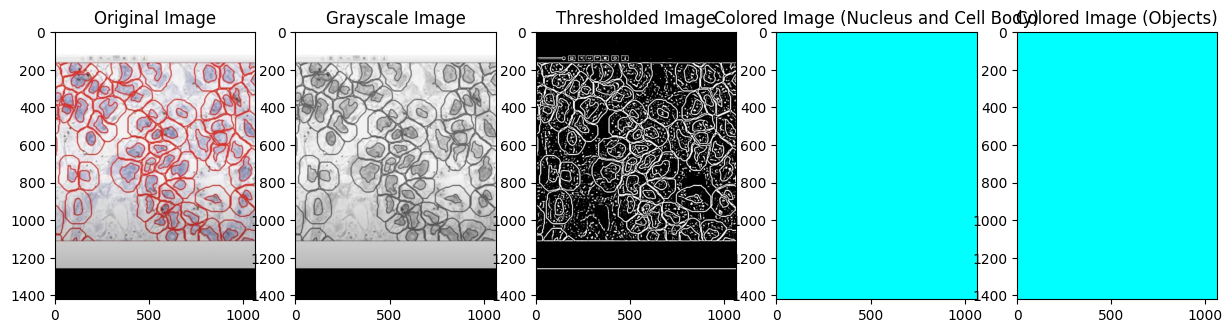

In [ ]:
# Create a mask for the objects
object_mask = polygons['coord'][0][..., 0] > 0

# Color the object areas
colored_image[object_mask[...,0]] = [255, 255, 0]  # Yellow for objects

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 5, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')

plt.subplot(1, 5, 3)
plt.title('Thresholded Image')
plt.imshow(nucleus_thresh, cmap='gray')

plt.subplot(1, 5, 4)
plt.title('Colored Image (Nucleus and Cell Body)')
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 5, 5)
plt.title('Colored Image (Objects)')
plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))

plt.show()


# **Using Different image **


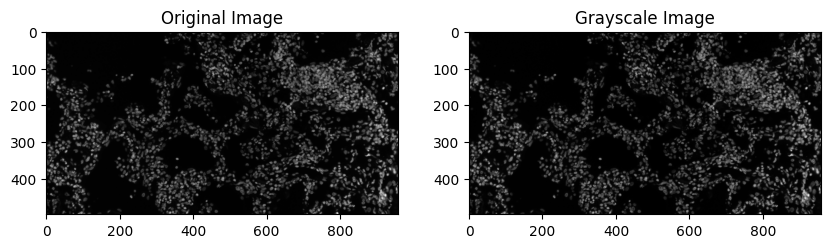

In [ ]:
# Load the image
# Try loading the image from a different path
image = cv2.imread('/content/drive/MyDrive/Segementation/cell/img.png')

# Or, try loading the image from a URL
import urllib.request

# url = 'https://example.com/cell_image.png'
# image = cv2.imread(urllib.request.urlopen(url))

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')
plt.show()

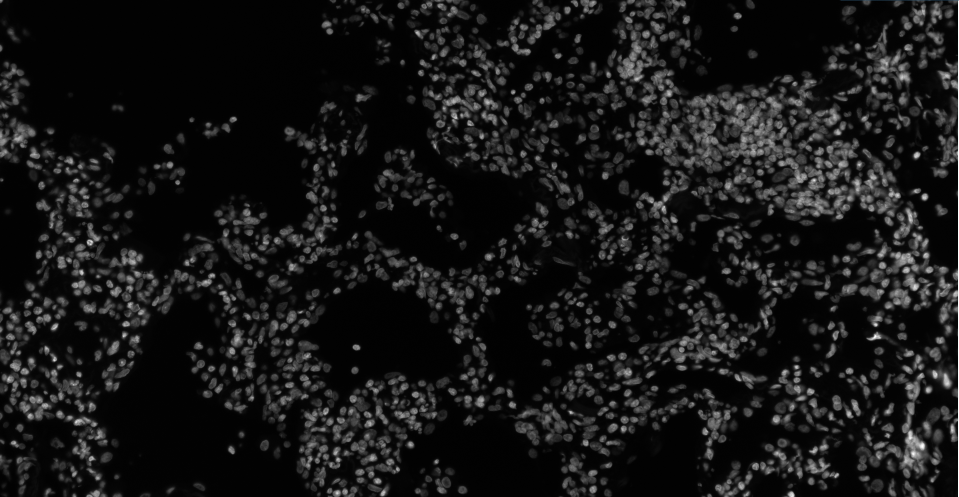

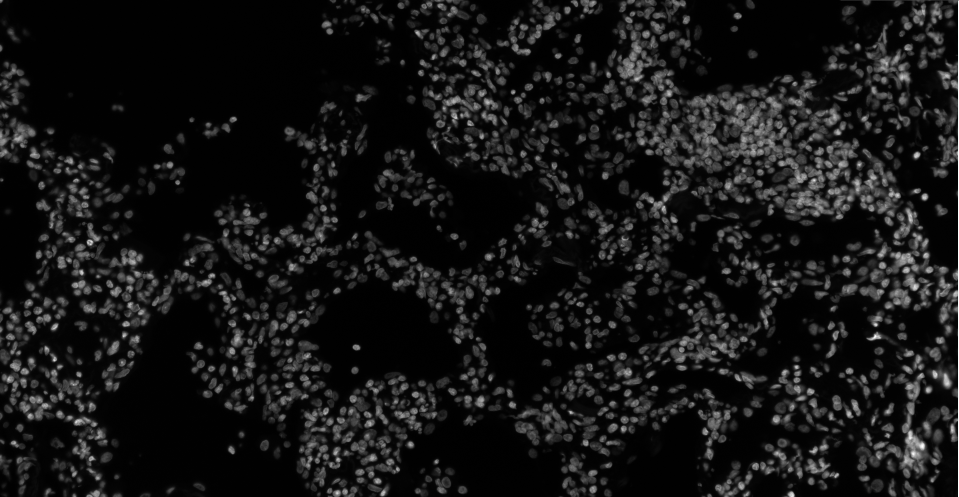

In [ ]:
import cv2
import numpy as np

def normalize_image(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Calculate the minimum and maximum pixel values
    min_val = np.min(gray)
    max_val = np.max(gray)

    # Normalize the image
    normalized_image = ((gray - min_val) / (max_val - min_val)) * 255

    # Convert back to uint8 (0-255)
    normalized_image = np.uint8(normalized_image)

    return normalized_image

# Load the image from a different path
image = cv2.imread('/content/drive/MyDrive/Segementation/cell/img.png')

# Normalize the image
normalized_image = normalize_image(image)

# Display the original and normalized images
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2_imshow(normalized_image)
image = normalized_image

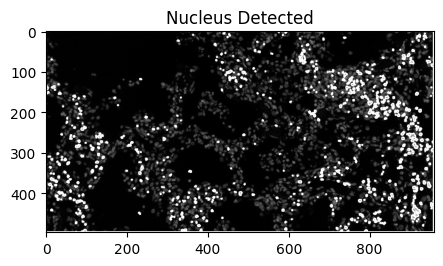

In [ ]:
# Apply thresholding to segment the nucleus
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
nucleus_detected = image.copy()
cv2.drawContours(nucleus_detected, contours, -1, (255, 255, 0), 2)

# Display the result
plt.figure(figsize=(5, 5))
plt.title('Nucleus Detected')
plt.imshow(cv2.cvtColor(nucleus_detected, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Replace 'your_folder' with the folder path in your Google Drive
image_path = '/content/drive/MyDrive/Segementation/cell/img.png'


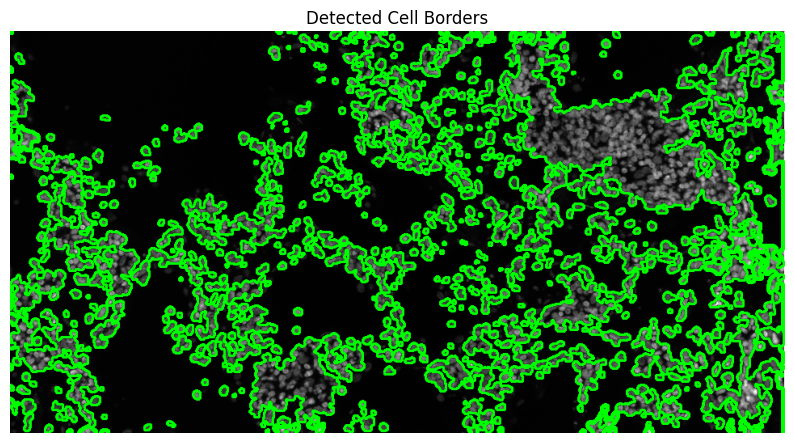

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, morphology

# Read the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply a Gaussian blur to denoise the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Use a thresholding algorithm to separate the cells
# Use Otsu's method to find the optimal threshold value
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find the edges using the Canny edge detection
edges = cv2.Canny(binary, 50, 150)

# Dilate the edges to make them more pronounced
dilated = cv2.dilate(edges, morphology.disk(1))

# Find contours of the cells
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contoured_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)

# Display the processed image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Cell Borders')
plt.axis('off')
plt.show()


In [ ]:
# Replace 'your_folder' with the folder path in your Google Drive
image_path = '/content/drive/MyDrive/Segementation/cell/img1.png'


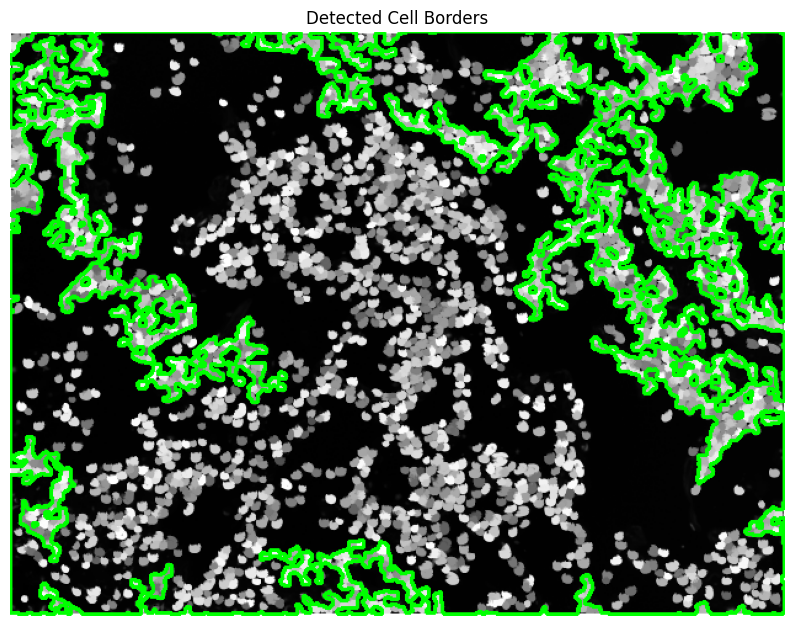

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, morphology

# Read the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply a Gaussian blur to denoise the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Use a thresholding algorithm to separate the cells
# Use Otsu's method to find the optimal threshold value
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find the edges using the Canny edge detection
edges = cv2.Canny(binary, 50, 150)

# Dilate the edges to make them more pronounced
dilated = cv2.dilate(edges, morphology.disk(1))

# Find contours of the cells
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contoured_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)

# Display the processed image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(contoured_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Cell Borders')
plt.axis('off')
plt.show()


In [ ]:
!pip install scipy.ndimage


ERROR: Could not find a version that satisfies the requirement scipy.ndimage (from versions: none)
ERROR: No matching distribution found for scipy.ndimage


<ipython-input-25-a80b49ba067c> (22): indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.


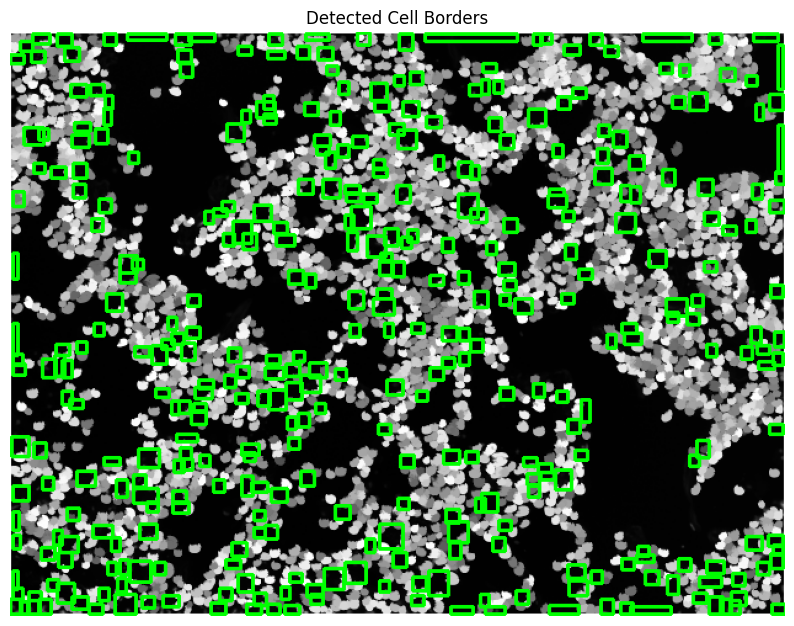

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, morphology, color, feature, segmentation
from scipy import ndimage as ndi

# Read the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply a Gaussian blur to denoise the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Use adaptive thresholding to handle varying lighting conditions
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Remove small white noise
binary_cleaned = morphology.remove_small_objects(binary.astype(bool), min_size=30)
binary_cleaned = morphology.remove_small_holes(binary_cleaned.astype(bool), area_threshold=30)

# Compute the exact Euclidean distance from every binary pixel to the nearest zero pixel, then find peaks in this distance map
distance = ndi.distance_transform_edt(binary_cleaned)
local_maxi = feature.peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=binary_cleaned)

# Perform a connected component analysis on the local peaks, using 8-connectivity
markers = ndi.label(local_maxi)[0]
labels = segmentation.watershed(-distance, markers, mask=binary_cleaned)

# Create an output image to display the results
output_image = color.gray2rgb(image)

# Draw boundaries of the detected cells
for region in measure.regionprops(labels):
    if region.area >= 50:  # Ignore small areas to avoid noise
        minr, minc, maxr, maxc = region.bbox
        cv2.rectangle(output_image, (minc, minr), (maxc, maxr), (0, 255, 0), 2)

# Display the processed image
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.title('Detected Cell Borders')
plt.axis('off')
plt.show()


<ipython-input-27-192c25227369> (22): indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.


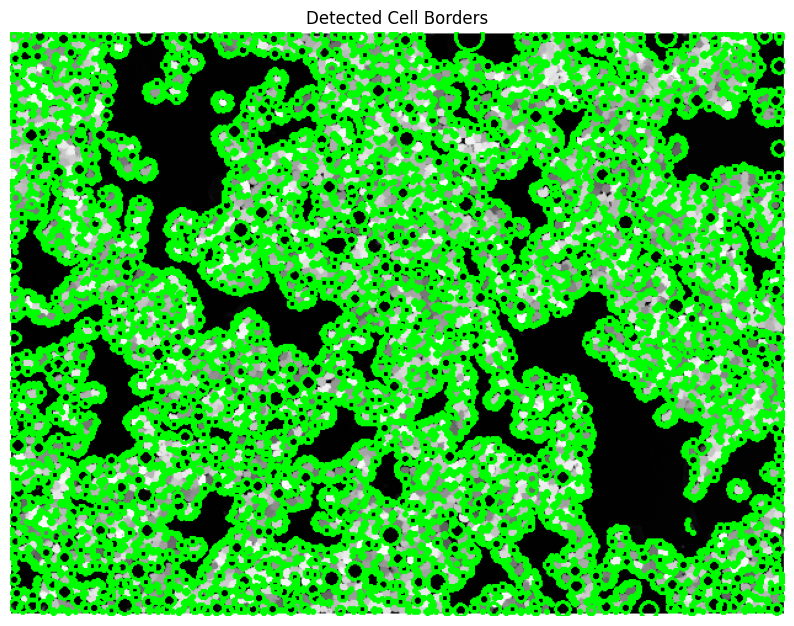

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, morphology, color, feature, segmentation
from scipy import ndimage as ndi

# Read the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply a Gaussian blur to denoise the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Use adaptive thresholding to handle varying lighting conditions
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Remove small white noise
binary_cleaned = morphology.remove_small_objects(binary.astype(bool), min_size=30)
binary_cleaned = morphology.remove_small_holes(binary_cleaned.astype(bool), area_threshold=30)

# Compute the exact Euclidean distance from every binary pixel to the nearest zero pixel, then find peaks in this distance map
distance = ndi.distance_transform_edt(binary_cleaned)
local_maxi = feature.peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=binary_cleaned)

# Perform a connected component analysis on the local peaks, using 8-connectivity
markers = ndi.label(local_maxi)[0]
labels = segmentation.watershed(-distance, markers, mask=binary_cleaned)

# Create an output image to display the results
output_image = color.gray2rgb(image)

# Draw circles around the detected cells
for region in measure.regionprops(labels):
    if region.area >= 5:  # Ignore small areas to avoid noise
        # Get the centroid of the region
        centroid = region.centroid
        # Compute the radius as the equivalent diameter of the region
        radius = int(region.equivalent_diameter / 2)
        # Draw the circle on the output image
        cv2.circle(output_image, (int(centroid[1]), int(centroid[0])), radius, (0, 255, 0), 2)

# Display the processed image
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.title('Detected Cell Borders')
plt.axis('off')
plt.show()


In [ ]:
# Replace 'your_folder' with the folder path in your Google Drive
image_path = '/content/drive/MyDrive/Segementation/cell/img.png'


<ipython-input-29-192c25227369> (22): indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.


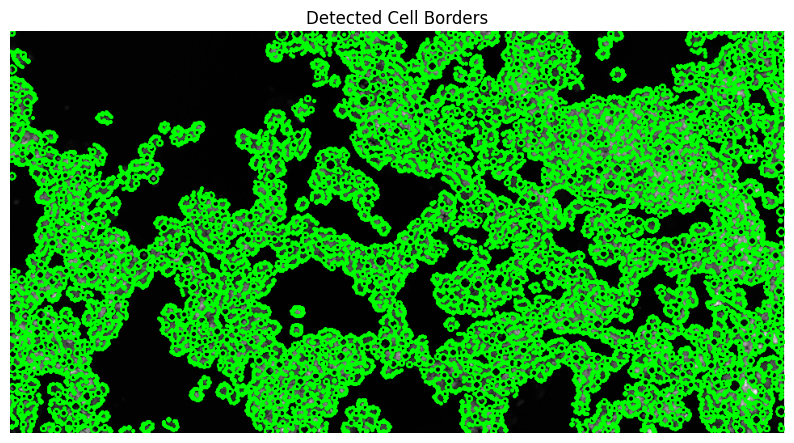

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, morphology, color, feature, segmentation
from scipy import ndimage as ndi

# Read the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply a Gaussian blur to denoise the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Use adaptive thresholding to handle varying lighting conditions
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Remove small white noise
binary_cleaned = morphology.remove_small_objects(binary.astype(bool), min_size=30)
binary_cleaned = morphology.remove_small_holes(binary_cleaned.astype(bool), area_threshold=30)

# Compute the exact Euclidean distance from every binary pixel to the nearest zero pixel, then find peaks in this distance map
distance = ndi.distance_transform_edt(binary_cleaned)
local_maxi = feature.peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=binary_cleaned)

# Perform a connected component analysis on the local peaks, using 8-connectivity
markers = ndi.label(local_maxi)[0]
labels = segmentation.watershed(-distance, markers, mask=binary_cleaned)

# Create an output image to display the results
output_image = color.gray2rgb(image)

# Draw circles around the detected cells
for region in measure.regionprops(labels):
    if region.area >= 5:  # Ignore small areas to avoid noise
        # Get the centroid of the region
        centroid = region.centroid
        # Compute the radius as the equivalent diameter of the region
        radius = int(region.equivalent_diameter / 2)
        # Draw the circle on the output image
        cv2.circle(output_image, (int(centroid[1]), int(centroid[0])), radius, (0, 255, 0), 2)

# Display the processed image
plt.figure(figsize=(10, 10))
plt.imshow(output_image)
plt.title('Detected Cell Borders')
plt.axis('off')
plt.show()
